In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
embs_cheb = np.load("../results/embs/Cheb.npy")
embs_cheb_bool = embs_cheb.astype(bool)

Text(0.5, 1.0, 'Эмбеддинги Cheb')

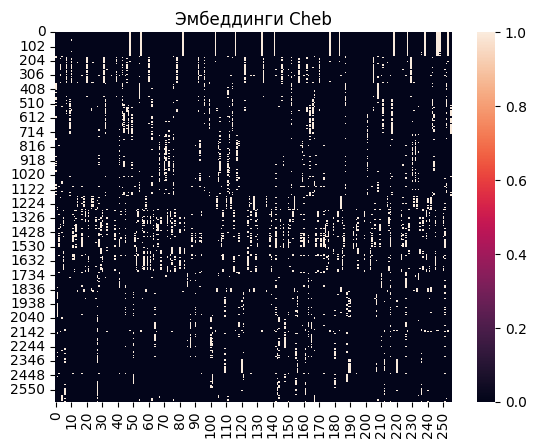

In [5]:
fig, ax = plt.subplots()
sns.heatmap(embs_cheb_bool, ax=ax)
ax.set_title("Эмбеддинги Cheb")

In [7]:
import faiss
import pandas as pd

In [16]:
# качество рекомендадтельной системы Sage
topn = 6
idx = 1908

embeddings_model = np.load("../results/embs/Sage.npy")
dim = embeddings_model.shape[1]
index = faiss.IndexFlatL2(dim)
index.add(embeddings_model)
okved_data = pd.read_csv('../data/okved2/okved_2014_w_sections.csv', index_col=0)

D, I = index.search(embeddings_model[[idx]], topn)
data = okved_data['native_code'] + ' ' + okved_data['name_okved']
closest = data.iloc[I[0]].tolist()
closest, D

(['50.10.21 Перевозка пассажиров морскими судами каботажного плавания, подчиняющимися расписанию',
  '50.10.2 Перевозка пассажиров морскими судами каботажного плавания',
  '50.10.32 Аренда морских судов каботажного плавания для перевозки пассажиров с экипажем',
  '50.10.11 Перевозка пассажиров морскими судами заграничного плавания, подчиняющимися расписанию',
  '50.10.3 Аренда морских судов заграничного и каботажного плавания для перевозки пассажиров с экипажем',
  '50.10.31 Аренда морских судов заграничного плавания для перевозки пассажиров с экипажем'],
 array([[0.        , 0.04130299, 0.0615933 , 0.08347001, 0.08445574,
         0.08999078]], dtype=float32))

In [ ]:
# визуализация 2d с подписями
